In [32]:
##Task 1 for argopy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
import argopy

In [34]:
from argopy import DataFetcher as ArgoDataFetcher
argo_loader = ArgoDataFetcher()
argo_loader

<datafetcher> 'Not initialised'
Current backend: erddap
Available fetchers: profile, float, region
User mode: standard

In [14]:
ds = argo_loader.region([-75, -45, 20, 30, 0, 10, '2000-01-01', '2006-12-31']).to_xarray()
print(ds)

<xarray.Dataset>
Dimensions:                (N_POINTS: 2007)
Coordinates:
  * N_POINTS               (N_POINTS) int64 0 1 2 3 4 ... 2003 2004 2005 2006
    LATITUDE               (N_POINTS) float64 28.32 24.48 21.12 ... 20.87 25.18
    LONGITUDE              (N_POINTS) float64 -70.29 -68.47 ... -50.31 -54.4
    TIME                   (N_POINTS) datetime64[ns] 2001-06-05T21:31:00 ... ...
Data variables: (12/13)
    CONFIG_MISSION_NUMBER  (N_POINTS) int64 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    CYCLE_NUMBER           (N_POINTS) int64 1 1 1 2 2 3 ... 10 75 10 10 133 133
    DATA_MODE              (N_POINTS) <U1 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D'
    DIRECTION              (N_POINTS) <U1 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER        (N_POINTS) int64 4900151 4900149 ... 4900359 4900360
    POSITION_QC            (N_POINTS) int64 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    ...                     ...
    PRES_QC                (N_POINTS) int64 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 

In [45]:
df = pd.read_csv('argopy_task1.csv', parse_dates=[15])

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   CONFIG_MISSION_NUMBER  2007 non-null   int64         
 1   CYCLE_NUMBER           2007 non-null   int64         
 2   DATA_MODE              2007 non-null   object        
 3   DIRECTION              2007 non-null   object        
 4   PLATFORM_NUMBER        2007 non-null   int64         
 5   POSITION_QC            2007 non-null   int64         
 6   PRES                   2007 non-null   float64       
 7   PRES_QC                2007 non-null   int64         
 8   PSAL                   2007 non-null   float64       
 9   PSAL_QC                2007 non-null   int64         
 10  TEMP                   2007 non-null   float64       
 11  TEMP_QC                2007 non-null   int64         
 12  TIME_QC                2007 non-null   int64         
 13  LAT

In [54]:
df['year'] = pd.DatetimeIndex(df['TIME']).year
df.head()

,CONFIG_MISSION_NUMBER,CYCLE_NUMBER,DATA_MODE,DIRECTION,PLATFORM_NUMBER,POSITION_QC,PRES,PRES_QC,PSAL,PSAL_QC,TEMP,TEMP_QC,TIME_QC,LATITUDE,LONGITUDE,TIME,year
0,1,1,D,A,4900151,1,10.0,1,36.782509,1,25.672001,1,1,28.323000,-70.288002,2001-06-05 21:31:00,2001
1,1,1,D,A,4900149,1,10.0,1,36.578522,1,27.816000,1,1,24.476999,-68.473999,2001-06-06 11:27:16,2001
2,1,1,D,A,4900147,1,10.0,1,36.248531,1,27.896000,1,1,21.122999,-67.584000,2001-06-07 00:19:39,2001
3,1,2,D,A,4900151,1,10.0,1,36.767799,1,27.472000,1,1,28.054001,-70.102997,2001-06-15 22:36:36,2001
4,1,2,D,A,4900147,1,10.0,1,36.128311,1,28.143999,1,1,20.860001,-67.906998,2001-06-16 23:53:46,2001


In [55]:
df_2001 = df[df['TIME'].dt.year == 2001]
df_2002 = df[df['TIME'].dt.year == 2002]
df_2003 = df[df['TIME'].dt.year == 2003]
df_2004 = df[df['TIME'].dt.year == 2004]
df_2005 = df[df['TIME'].dt.year == 2005]
df_2006 = df[df['TIME'].dt.year == 2006]

In [56]:
d1 = df_2001.append(df_2002)
d2 = d1.append(df_2003)
d3 = d2.append(df_2004)
d4 = d3.append(df_2005)
d5 = d4.append(df_2006)

In [57]:
import geopandas as gpd

In [58]:
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))
countries

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


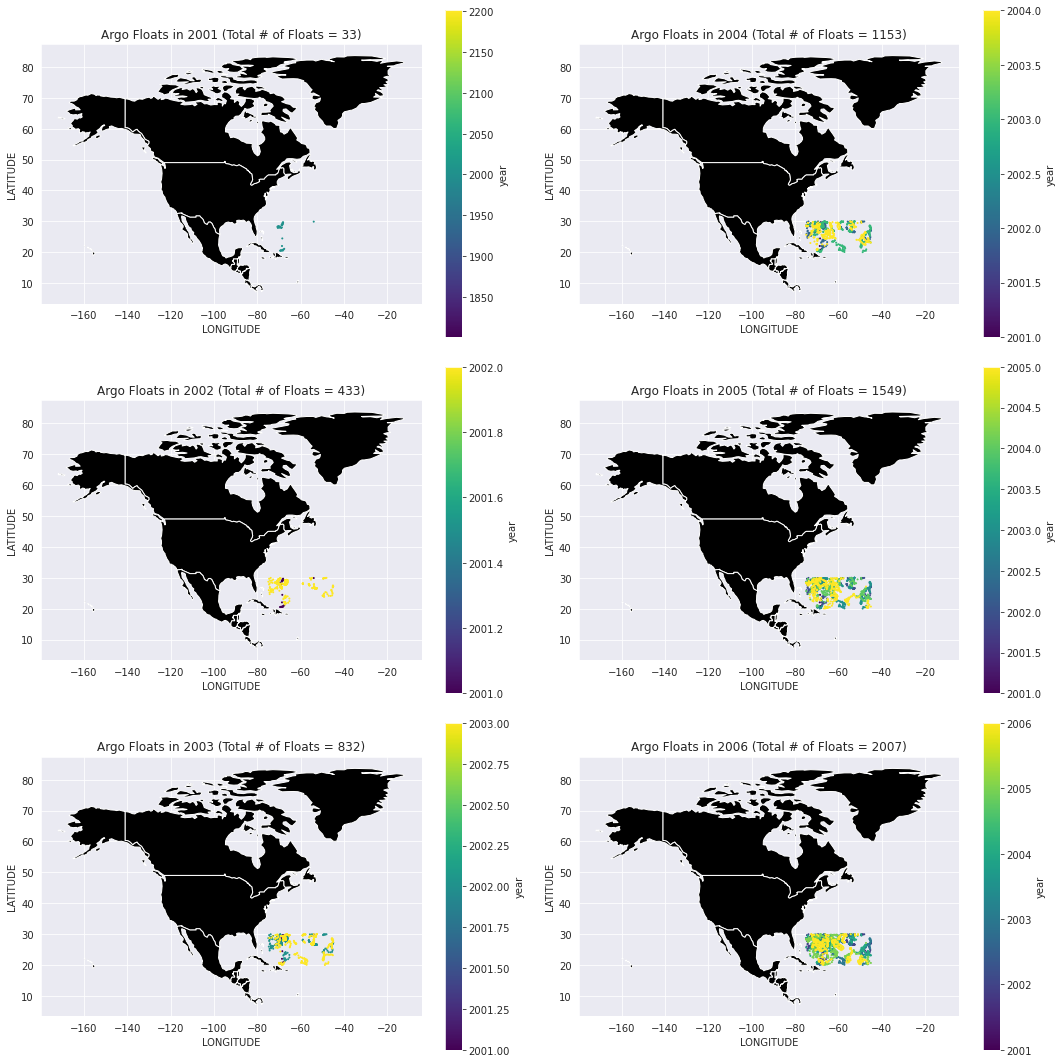

In [61]:
# Start the plot
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,15))
# plot map on axis

countries[countries["continent"] == "North America"].plot(ax=ax[0,0],color="black",
                                                )
countries[countries["continent"] == "North America"].plot(ax=ax[1,0],color="black",
                                                )
countries[countries["continent"] == "North America"].plot(ax=ax[2,0],color="black",
                                                )
countries[countries["continent"] == "North America"].plot(ax=ax[0,1],color="black",
                                                )
countries[countries["continent"] == "North America"].plot(ax=ax[1,1],color="black",
                                                )
countries[countries["continent"] == "North America"].plot(ax=ax[2,1],color="black",
                                                )

# plot points
df_2001.plot(ax=ax[0,0], x="LONGITUDE", y="LATITUDE", kind="scatter", c="year", colormap="viridis", s=1)
ax[0, 0].set_title(f'Argo Floats in 2001 (Total # of Floats = {len(df_2001)})') ##ADD the count!!
d1.plot(ax=ax[1,0], x="LONGITUDE", y="LATITUDE", kind="scatter", c="year", colormap="viridis", s=1)
ax[1, 0].set_title(f'Argo Floats in 2002 (Total # of Floats = {len(d1)})')
d2.plot(ax=ax[2,0], x="LONGITUDE", y="LATITUDE", kind="scatter", c="year", colormap="viridis", s=1)
ax[2, 0].set_title(f'Argo Floats in 2003 (Total # of Floats = {len(d2)})')
d3.plot(ax=ax[0,1], x="LONGITUDE", y="LATITUDE", kind="scatter", c="year", colormap="viridis", s=1)
ax[0, 1].set_title(f'Argo Floats in 2004 (Total # of Floats = {len(d3)})')
d4.plot(ax=ax[1,1], x="LONGITUDE", y="LATITUDE", kind="scatter", c="year", colormap="viridis", s=1)
ax[1, 1].set_title(f'Argo Floats in 2005 (Total # of Floats = {len(d4)})')
d5.plot(ax=ax[2,1], x="LONGITUDE", y="LATITUDE", kind="scatter", c="year", colormap="viridis", s=1)
ax[2, 1].set_title(f'Argo Floats in 2006 (Total # of Floats = {len(d5)})')
# add grid
# add grid
ax[0, 0].grid()
ax[1, 0].grid()
ax[2, 0].grid()
ax[0, 1].grid()
ax[1, 1].grid()
ax[2, 1].grid()
#ax.grid(b=True, alpha=0.5)
fig.tight_layout()
plt.show()